In [1]:
import numpy as np

In [2]:
def load_data_set():
    """
    读取数据,在X的第一列添加1.0
    :return: 
    """
    data_arr = []
    label_arr = []
    f = open('TestSet.txt','r')
    for line in f.readlines():
        line_arr = line.strip().split()
        data_arr .append([1.0,np.float(line_arr[0]),np.float(line_arr[1])])
        label_arr.append(int(line_arr[2]))
    return data_arr,label_arr
        

In [3]:
def sigmoid(X):
    return 1.0 / (1 + np.exp(-X))


In [4]:
def grad_descent(data_arr, class_labels, alpha=0.001, max_cycles=500):
    losses = []
    data_mat = np.mat(data_arr)  # (m,n+1)
    label_mat = np.mat(class_labels).T  # 列矩阵(m,1)
    m, n = data_mat.shape  # 注意这里的n已经是加了一列1的
    weights = np.ones((n, 1))  #(n+1,1)
    for k in range(max_cycles):
        h = sigmoid(data_mat * weights)  # (m,1)
        error = h - label_mat  #(m,1)
        weights = weights - alpha / m * data_mat.T * error
        losses.append(loss(data_mat,label_mat,weights))
    
    return weights,losses


In [5]:

def plot_best_fit(weights):
    import matplotlib.pyplot as plt
    data_mat ,label_mat = load_data_set()
    data_arr = np.array(data_mat)
    n = data_arr.shape[0]
    x_cord1,y_cord1,x_cord2,y_cord2 = [],[],[],[]
    # 遍历数据集每一行
    for i in range(n):
        if int(label_mat[i] == 1): # 正例
            x_cord1.append(data_arr[i,1])
            y_cord1.append(data_arr[i,2])
        else:
            x_cord2.append(data_arr[i,1])
            y_cord2.append(data_arr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x_cord1,y_cord1,s=30,color='k',marker='^')
    ax.scatter(x_cord2,y_cord2,s=30,color='red',marker='s')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    y = y.reshape((60,))
    
    
    ax.plot(x,y)
    plt.xlabel('x1')
    plt.ylabel('y1')
    plt.show()
    

In [14]:
def loss(X,y,weights):
    # all is mat
    weights = np.mat(weights)
    y_predict = np.dot(X,weights)
    loss = y.T * X * weights - np.sum(np.log(1 + np.exp(X * weights)))
    return -loss

def plot_loss(losses):
    import matplotlib.pyplot as plt
    x_cord = losses
    y_cord = [i for i in range(len(losses))]
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(111)
    ax.scatter(x_cord,y_cord,s=30,color='k',marker='^')
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.show()

In [12]:
def test():
    data_arr,class_labels = load_data_set()
    weights,losses = grad_descent(np.array(data_arr),class_labels)
#     plot_best_fit(weights)
    plot_loss(losses)

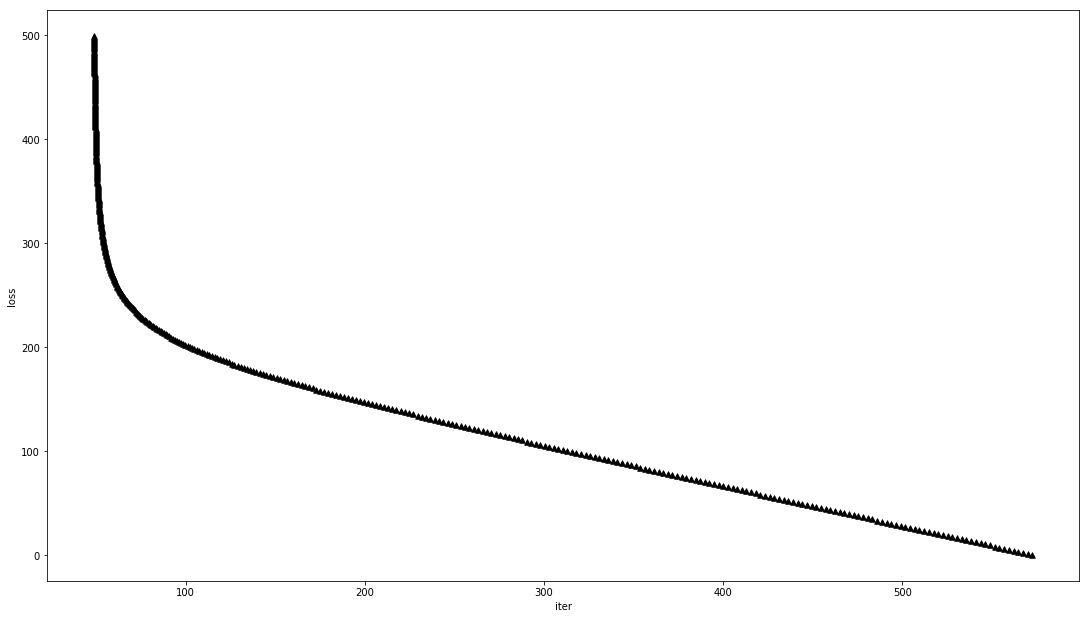

In [15]:
test()